In [13]:
# weight for the columns? Xinhang knows

import pandas as pd
from scipy import stats
import numpy as np

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/newmicedata/PCFAnimal{}.xlsx".format(i))
    mouse_df_list.append(df)

print(len(mouse_df_list))
mouse_df_list[0]


16


,Unnamed: 0,DateTime,principal component 1,principal component 2,principal component 3
0,0,2022/11/04 14:01:00,17.132797,1.502005,-6.294937
1,1,2022/11/04 14:31:00,16.811791,2.291058,-7.172389
2,2,2022/11/04 15:01:00,15.028200,2.660764,-6.699671
3,3,2022/11/04 15:31:00,14.183293,2.758718,-5.704350
4,4,2022/11/04 16:01:00,11.949887,3.195511,-4.635048
...,...,...,...,...,...
1136,1136,2022/11/28 06:01:00,-1.396782,-0.328081,-1.957727
1137,1137,2022/11/28 06:31:00,-4.110406,0.404820,-0.490767
1138,1138,2022/11/28 07:01:00,-0.687362,-0.372090,-2.771991
1139,1139,2022/11/28 07:31:00,1.670424,-0.888519,-3.420816


In [14]:
pc_list = list()
# get rid of first 2 columns, left with 3 PC
for i in range(len(mouse_df_list)):
    pc_list.append(mouse_df_list[i].drop(['Unnamed: 0', 'DateTime'], axis=1))

pc_list[0]


,principal component 1,principal component 2,principal component 3
0,17.132797,1.502005,-6.294937
1,16.811791,2.291058,-7.172389
2,15.028200,2.660764,-6.699671
3,14.183293,2.758718,-5.704350
4,11.949887,3.195511,-4.635048
...,...,...,...
1136,-1.396782,-0.328081,-1.957727
1137,-4.110406,0.404820,-0.490767
1138,-0.687362,-0.372090,-2.771991
1139,1.670424,-0.888519,-3.420816


In [15]:
# create mean, covariance matrix, skewness, kurtosis for each mouse, with the form (un1, un2, un3) where n is the mouse number
mean = list()
cov = list()
skew = list()
kurt = list()

for mouse in pc_list:
    # create (un1, un2, un3) for each 16 mice
    mouse_mean = []
    mouse_cov = []
    mouse_skew = []
    mouse_kurt = []

    # get individual mouse moments
    for i in range(1,4):
        column = mouse['principal component {}'.format(i)].to_numpy()
        col_moments = stats.describe(column)
        mouse_mean.append((col_moments).mean)
        mouse_cov.append((col_moments).variance)
        mouse_skew.append((col_moments).skewness)
        mouse_kurt.append((col_moments).kurtosis)

    mean.append(mouse_mean)
    cov.append(mouse_cov)
    skew.append(mouse_skew)
    kurt.append(mouse_kurt)

print(mouse)
print(column)
mean

      principal component 1  principal component 2  principal component 3
0                 19.705686              -1.521264              -7.538177
1                 15.818246              -0.992557              -5.750222
2                 15.982283              -0.734652              -5.989540
3                 13.602274              -0.079941              -5.262851
4                 15.997229              -1.173691              -6.303891
...                     ...                    ...                    ...
1136               4.127321              -6.260466              -1.459008
1137              -3.614452              -4.737815               2.550725
1138              -4.649900              -4.285637               1.261619
1139              -5.191185              -4.158483               1.300343
1140              -4.679935              -4.261079               0.923756

[1141 rows x 3 columns]
[-7.5381774  -5.75022228 -5.98954046 ...  1.26161934  1.30034273
  0.92375605]


[[1.455012805941131, 1.3293823308635764, -1.5716914179023196],
 [-0.8424905791627533, -2.6476195087772467, -2.2408044289469107],
 [1.3325001860099694, 1.3302126322019623, -1.6376558297097552],
 [1.1987422926059046, -0.15707126864373924, 0.1018726922296942],
 [0.6413795141551765, 1.2882340518123638, -1.3994878068765573],
 [-0.002213957077246587, 2.3053888076619176, -1.4378375110030537],
 [0.4106217792320968, -2.5138724224112936, 1.8154670675950089],
 [1.406247615508686, -0.710778450829763, 0.5780236041141251],
 [0.6896046393378459, 1.519722557434675, -3.191541658494069],
 [1.5732788040543069, 0.6634315273599191, -2.814507998042851],
 [2.1211958993005293, -1.6697600338956096, 0.6623798030935452],
 [2.017602119004723, 0.45352509557515347, -0.5093129595203341],
 [0.5225385799798776, 0.14596982071913497, 0.32474425818974717],
 [0.19955310505665685, -1.0187987522051796, 1.2538720436867634],
 [2.0881552722245775, -0.9537289451567613, 0.13492881236674573],
 [2.0443873386273155, -2.302158283733

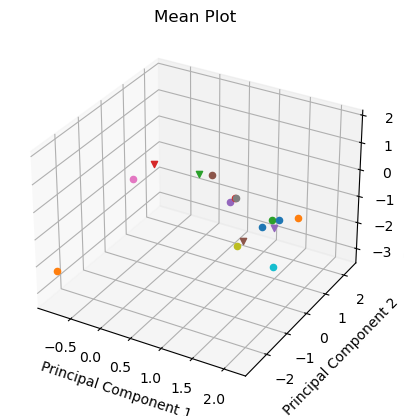

In [16]:
import matplotlib.pyplot as plt

# start plots for the moments, first mean
ax = plt.axes(projection="3d")
ax.set_title("Mean Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(mean)):
    if i < 12:
        ax.scatter(*mean[i])
    else:
        ax.scatter(*mean[i], marker="v")
plt.show()

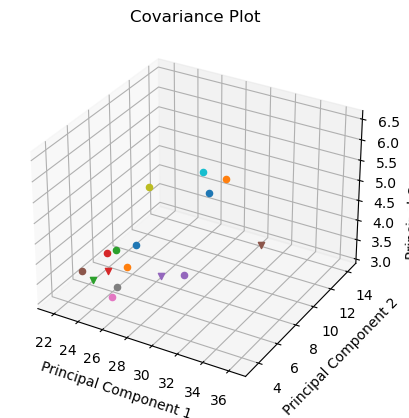

In [17]:
# cov plot
ax = plt.axes(projection="3d")
ax.set_title("Covariance Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(cov)):
    if i < 12:
        ax.scatter(*cov[i])
    else:
        ax.scatter(*cov[i], marker="v")
plt.show()

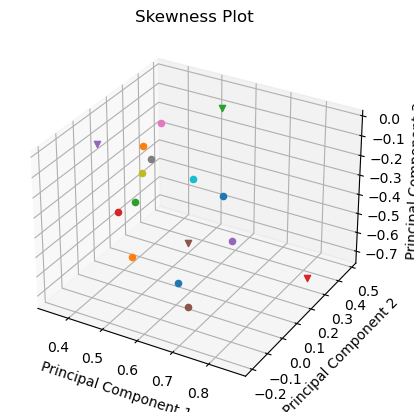

In [18]:
# skewness plot
ax = plt.axes(projection="3d")
ax.set_title("Skewness Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(skew)):
    if i < 12:
        ax.scatter(*skew[i])
    else:
        ax.scatter(*skew[i], marker="v")
plt.show()

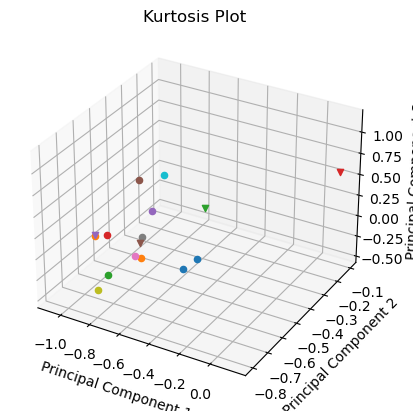

In [19]:
# kurtosis plot
ax = plt.axes(projection="3d")
ax.set_title("Kurtosis Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

for i in range(len(kurt)):
    if i < 12:
        ax.scatter(*kurt[i])
    else:
        ax.scatter(*kurt[i], marker="v")
plt.show()


In [20]:
# convert mean, cov, skew, and kurt to dataframes for plotly
# current format: list of tuples/lists with 3 elements each

# add marker column for healthy vs sick
type = ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor','Tumor', 'Control', 'Control', 'Tumor', 'Tumor','Tumor', 'Tumor', 'Tumor', 'Tumor', 'Control', 'Control']

mean_df = pd.DataFrame(mean, columns = ['PC_1', 'PC_2', 'PC_3'])
mean_df['Type'] = type

cov_df = pd.DataFrame(cov, columns = ['PC_1', 'PC_2', 'PC_3'])
cov_df['Type'] = type

skew_df = pd.DataFrame(skew, columns = ['PC_1', 'PC_2', 'PC_3'])
skew_df['Type'] = type

kurt_df = pd.DataFrame(kurt, columns = ['PC_1', 'PC_2', 'PC_3'])
kurt_df['Type'] = type

mean_df

,PC_1,PC_2,PC_3,Type
0,1.455013,1.329382,-1.571691,Tumor
1,-0.842491,-2.647620,-2.240804,Tumor
2,1.332500,1.330213,-1.637656,Tumor
3,1.198742,-0.157071,0.101873,Tumor
4,0.641380,1.288234,-1.399488,Tumor
5,-0.002214,2.305389,-1.437838,Tumor
6,0.410622,-2.513872,1.815467,Control
7,1.406248,-0.710778,0.578024,Control
8,0.689605,1.519723,-3.191542,Tumor
9,1.573279,0.663432,-2.814508,Tumor


In [21]:
# Trying Plotly for 3d graphs
import plotly.express as px

fig = px.scatter_3d(mean_df, x='PC_1', y='PC_2', z='PC_3', title='Mean Plot',color='Type')
# fig.write_html("downloads/mean.html")
fig.show()

In [22]:
fig = px.scatter_3d(cov_df, x='PC_1', y='PC_2', z='PC_3', title='Covariance Plot',color='Type')
# fig.write_html("downloads/variance.html")
fig.show()

In [23]:
fig = px.scatter_3d(skew_df, x='PC_1', y='PC_2', z='PC_3', title='Skewness Plot',color='Type')
# fig.write_html("downloads/skewness.html")
fig.show()

In [24]:
fig = px.scatter_3d(kurt_df, x='PC_1', y='PC_2', z='PC_3', title='Kurtosis Plot',color='Type')
# fig.write_html("downloads/kurtosis.html")
fig.show()